<a href="https://colab.research.google.com/github/LuisaVALvarezS/CoderLab/blob/main/Visualizaci%C3%B3n_Luisa_%C3%81lvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
mpl.style.use('bmh')

In [5]:
df = pd.read_excel('https://raw.githubusercontent.com/LuisaVALvarezS/CoderLab/main/VentasMoriche.xls')

In [6]:
df.head()

,Recibo N°,Codigo,Descripcion,Fecha,Hora,Precio,Cant,Importe,Util,FP,Cliente,Rubro,Marca,Proveedor
0,1,0036,QUESO GOUDA VERONICA,2022/04/25,09:52,2056.0,0.495,1017.720,407.1375,E,Consumidor Final,FIAMBRERIA,VERONICA,BANYLAC
1,2,7793281493045,HAMBURGUESA UNION GANADERA X2,2022/04/25,09:57,175.0,6.000,1050.000,420.0000,E,Consumidor Final,FRESCOS,UNIÓN GANADERA,BANYLAC
2,3,0022,QUESO BARRA PUNTA DEL AGUA,2022/04/25,10:01,1250.0,0.210,262.500,105.0000,E,Consumidor Final,FIAMBRERIA,PUNTA DEL AGUA,BANYLAC
3,4,0050,MORTADELA SELLO DE PLATA,2022/04/25,10:08,660.0,0.200,132.000,52.8360,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC
4,4,0042,PALETA SELLO DE PLATA,2022/04/25,10:08,955.0,0.195,186.225,74.5017,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51725 entries, 0 to 51724
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recibo N°    51725 non-null  int64  
 1   Codigo       51725 non-null  object 
 2   Descripcion  51725 non-null  object 
 3   Fecha        51725 non-null  object 
 4   Hora         51725 non-null  object 
 5   Precio       51725 non-null  float64
 6   Cant         51725 non-null  float64
 7   Importe      51725 non-null  float64
 8   Util         51725 non-null  float64
 9   FP           51724 non-null  object 
 10  Cliente      51725 non-null  object 
 11  Rubro        51723 non-null  object 
 12  Marca        47851 non-null  object 
 13  Proveedor    50838 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.5+ MB


In [8]:
df.describe()

,Recibo N°,Precio,Cant,Importe,Util
count,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000
mean,17731.938888,374.143835,11.273049,253.188327,63.149827
std,10199.330397,536.462743,75.826682,238.631772,3216.409187
min,1.000000,0.000000,0.001000,0.000000,-524526.470000
25%,8934.000000,100.000000,1.000000,110.000000,40.000000
50%,17737.000000,200.000000,1.000000,200.000000,61.150000
75%,26569.000000,362.500000,1.000000,320.000000,100.000000
max,35525.000000,6836.497500,3847.000000,7400.000000,5399.000000


In [9]:
df.index = df['Rubro']
df.head()

,Recibo N°,Codigo,Descripcion,Fecha,Hora,Precio,Cant,Importe,Util,FP,Cliente,Rubro,Marca,Proveedor
Rubro,,,,,,,,,,,,,,
FIAMBRERIA,1,0036,QUESO GOUDA VERONICA,2022/04/25,09:52,2056.0,0.495,1017.720,407.1375,E,Consumidor Final,FIAMBRERIA,VERONICA,BANYLAC
FRESCOS,2,7793281493045,HAMBURGUESA UNION GANADERA X2,2022/04/25,09:57,175.0,6.000,1050.000,420.0000,E,Consumidor Final,FRESCOS,UNIÓN GANADERA,BANYLAC
FIAMBRERIA,3,0022,QUESO BARRA PUNTA DEL AGUA,2022/04/25,10:01,1250.0,0.210,262.500,105.0000,E,Consumidor Final,FIAMBRERIA,PUNTA DEL AGUA,BANYLAC
FIAMBRERIA,4,0050,MORTADELA SELLO DE PLATA,2022/04/25,10:08,660.0,0.200,132.000,52.8360,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC
FIAMBRERIA,4,0042,PALETA SELLO DE PLATA,2022/04/25,10:08,955.0,0.195,186.225,74.5017,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC


ValueError: ignored

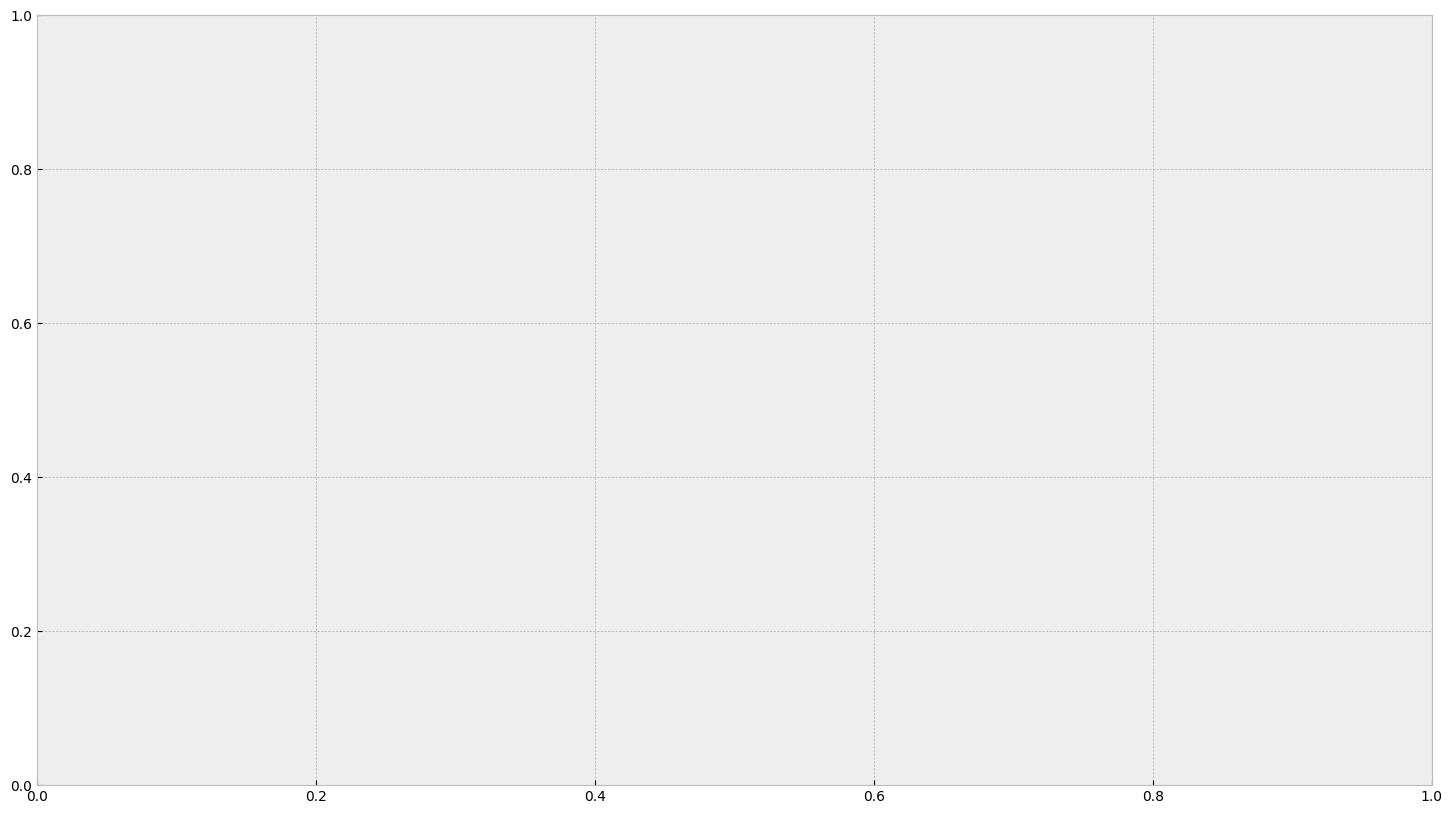

In [21]:
import numpy as np
fig, ax = plt.subplots(figsize=(18, 10), dpi=100)  # 800x500 px

x = np.arange(df.index.size)
y1 = df.sum(axis='Importe')
y2 = df.sum(axis='Cant')

Ventas_Rubro = ax.bar(x, y1, label='Importe', color='#ffd700')
Cant_Rubro = ax.bar(x, y2, label='Cantidad', color='#aaa9ad')

ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90)
ax.legend()

# Etiquetas en barras
ax.bar_label(Ventas_Rubro, padding=3)
ax.bar_label(Cant_Rubro, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura
fig